# Identificador partido mas afin

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier           
from sklearn.neighbors import KNeighborsClassifier            
from sklearn.ensemble import GradientBoostingClassifier       
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from random import seed
from random import randint
import statsmodels.formula.api as smf


In [2]:
#Abro el texto donde están los datos 
def abrircsv(nombre,direcion,delimitador,heade):
    nombre=pd.read_csv(direcion,delimiter= delimitador, header=heade)
    return nombre

In [71]:
encuesta = abrircsv("encuesta",'../trabajo final macroencuesta/DA3242','\t',None)

In [72]:
#Gracias al libro de códigos, se crea  un diccionario con el nombre de las columnas y donde se realizan los cortes, para crear el DataFrame 
columnas={"ESTU": [1,4], "CUES": [5,9], "CCAA":[10,11], "PROV": [12,13], "MUN": [14,16], "TAMUNI": [17,17], "CAPITAL": [18,18], "DISTR": [19,20], "SECCION": [21,23],"ENTREV": [24,27], "P0A": [28,28], "P1": [29,29], "P2": [30,30], "P3": [31,31], "P4": [32,32], "P501": [33,33], "P502": [34,34], "P503": [35,35], "P601": [36,37], "P602": [38,39], "P603": [40,41],"P701": [42,43], "P702": [44,45], "P703": [46,47], "P801": [48,48], "P802": [49,49], "P803": [50,50], "P804": [51,51], "P805": [52,52], "P806": [53,53], "P807": [54,54], "P808": [55,55],"P809": [56,56], "P810": [57,57], "P811": [58,58], "P812": [59,59], "P813": [60,60], "P814":[61,61], "P815": [62,62], "P816": [63,63], "P9": [64,64], "P9A":[65,65], "P9B01": [66,67], "P9B02": [68,69],"P10": [70,71], "P10A": [72,73], "P1101": [74,75], "P1102": [76,77], "P1103": [78,79], "P1104": [80,81], "P1105": [82,83], "P1106": [84,85],"P12":[86,87], "P1301": [88,89], "P1302": [90,91], "P1303": [92,93], "P1304": [94,95], "P1305": [96,97], "P1306": [98,99], "P1307": [100,101],"P1308": [102,103], "P1309": [104,105], "P1310": [106,107], "P1311": [108,109], "P1312": [110,111], "P1313": [112,113], "P1314": [114,115],"P1315": [116,117], "P1316": [118,119], "P1317": [120,121], "P1318": [122,123], "P1319": [124,125], "P1320": [126,127], "P14": [128,129],"P15": [130,131], "P16": [132,133], "P17": [134,135], "P18": [136,136], "P18A": [137,138], "P19": [139,140], "P2001": [141,142], "P2002": [143,144],"P2003": [145,146], "P2004" :[147,148], "P2005": [149,150], "P2006": [151,152], "P2007": [153,154], "P2008": [155,156],"P2009": [157,158],"P2010": [159,160], "P2011": [161,162], "P2012": [163,164], "P2013": [165,166], "P2014": [167,168], "P2015": [169,170], "P2016": [171,172],"P2017": [173,174], "P2018": [175,176], "P2019": [177,178], "P2020": [179,180], "P21": [181,182], "P21A": [183,184], "P22": [185,185], "P23": [186,187],"P24": [188,188], "P24A": [189,190], "P25": [191,191], "P25A":[192,193], "P26":[194,194], "P27": [195,195], "P28": [196,196], "P29": [197,197], "P30": [198,198], "P30A": [199,199], "P31":[200,200],"E101": [201,202], "E102": [203,204], "E103": [205,206], "E2": [207,209], "E3": [210,210], "C1": [211,211], "C1A": [212,213], "PESO": [214,220],"P9BCOMR": [221,224], "P10R": [225,226], "P10AR": [227,228], "VOTOSIMG": [229,230], "P18AR": [231,232], "RECUERDO": [233,234], "P9BCOM": [235,238],"P14R": [239,240], "P15R": [241,242], "P16R": [243,244], "ESTUDIOS": [245,245], "PESOCCAA": [246,252]}

In [73]:
#se aplican los intervalos del diccionario en el DataFrame que hemos obtenido para poder crear las columnas
def get_intervals(x, a, b): 
    try: 
        return x[a:b]
    except: 
        print(x, a, b)

for a in columnas:
    encuesta[a] = encuesta[0].apply(lambda x: get_intervals(x, columnas[a][0]-1, columnas[a][1]))

In [74]:
#Eliminamos la columna 0, dado que ya no nos sirve
def drop_columna(data,columna,axis=1,inplace=True):
    return data.drop(columna, axis=1, inplace=True)
drop_columna(encuesta,0)

In [75]:
#convertimos las columnas en numericas 
def get_numeric(x):
    try:
        return int(x)
    except:
        return 0
for a in columnas:
    encuesta[a] = encuesta[a].apply(get_numeric)

In [8]:
#seleccionamos las columnas que no nos interesan y las eliminamos
columnas_para_eliminar=("ESTU","CUES","PROV","MUN","DISTR","SECCION","ENTREV","P501","P502","P503","P601","P602","P603","P701","P702","P703","P805","P806","P807","P808","P809","P810","P811","P812","P813","P814","P815","P816","P9","P9A","P9B01","P9B02","P10","P1101","P1102","P1103","P1104","P1105","P1106","P1305","P1306","P1307","P1308","P1309","P1310","P1311","P1312","P1313","P1314","P1315","P1316","P1317","P1318","P1319","P1320","P14","P15","P16","P17","P18","P18A","P2005","P2006","P2007","P2008","P2009","P2010","P2011","P2012","P2013","P2014","P2015","P2016","P2017","P2018","P2019","P2020","P21","P21A","P24A","P25A","P29","P30","P30A","P31","E101","E102","E103","E2","E3","C1","C1A","VOTOSIMG","RECUERDO","P9BCOM","P15R","P16R","P10AR","P9BCOMR","P10A","P24","P10R","P12","P18AR","PESO","PESOCCAA")
for a in columnas_para_eliminar:
    drop_columna(encuesta,a)

In [76]:
#se crean listas para ordenar el DataFrame
cols=["P1","P2","P3","P4","P801","P802","P803","P804","P1301","P1302","P1303","P1304","P2001","P2002","P2003","P2004","P23","TAMUNI","ESTUDIOS","CAPITAL","CCAA","P0A","P14R","P22","P25","P26","P27","P28","P19"]

In [77]:
#Ordenamos el DataFrame
encuesta = encuesta[cols]

In [78]:
#Al ser una encuesta no existen valores nulos, en el sentido de no dato, pero si que existen valores como NS o NC.
#que son los que se entenderian por nulos, el problema es que la codificación puede ser por el valor 9 o 99 para NS
#por lo que se debe de especificar cada variable según sea la codificación
limpieza9=("ESTUDIOS","P0A","P1","P2","P3","P4","P801","P802","P803","P804","P23","P25","P26","P27","P28")
limpieza99=("P1301","P1302","P1303","P1304","P2001","P2002","P2003","P2004","P19","P14R")

In [12]:
#funcion para quitar los datos según el valor de una columna
def drop_file(data,pregunta,valor):
    data = data[data[pregunta] != valor]
    return data

In [79]:
#Se eliminan los NC-8 ó 88 y NS - 9 ó 99 de las variables
for a in limpieza9:
    encuesta = drop_file(encuesta,a,8)
    encuesta = drop_file(encuesta,a,9)
for a in limpieza99:
    encuesta = drop_file(encuesta,a,88)
    encuesta = drop_file(encuesta,a,98)
    encuesta = drop_file(encuesta,a,99)

In [80]:
#Se eliminan de la columna "ESTUDIOS", "7" que es otros
encuesta = drop_file(encuesta,"ESTUDIOS",7)

In [81]:
#se reordenan el indice, dado que con las eliminaciones se ha desorganizado 
encuesta=encuesta.reset_index()

In [16]:
#funcion recodificacion
def recodificacion(etiquetas,cortes,data,nombrenuevacolumna,nombrecolumna_anterior):
    data[nombrenuevacolumna] = pd.cut(data[nombrecolumna_anterior],cortes, labels=etiquetas)
    return data

In [82]:
#se recodifica  la variable P19, en 3 categorias 0=Izquierda,1=Centro,2=Derecha
recodificacion([0,1,2,3],[0,30,45,65,100],encuesta,"edad","P23");
recodificacion([1,2,3],[0,3,6,10],encuesta,"ideologia","P19");

In [83]:
#Se recodifica la variable P14R
encuesta['partido'] = encuesta['P14R']
encuesta['partido'] = encuesta['partido'].replace(5, 3)
encuesta['partido'] = encuesta['partido'].replace(17, 9)
encuesta['partido'] = encuesta['partido'].replace(18, 5)
encuesta['partido'] = encuesta['partido'].replace(6, 3)
encuesta['partido'] = encuesta['partido'].replace(8, 6)
encuesta['partido'] = encuesta['partido'].replace(17, 8)
encuesta['partido'] = encuesta['partido'].replace(7, 9)
encuesta['partido'] = encuesta['partido'].replace(9, 9)
encuesta['partido'] = encuesta['partido'].replace(11, 7)
encuesta['partido'] = encuesta['partido'].replace(12, 8)
encuesta['partido'] = encuesta['partido'].replace(95, 9)
encuesta['partido'] = encuesta['partido'].replace(97, 10)

In [84]:
#Eliminamos las columnas no deseadas 
lista_drop=["P23","P14R","P19","index"]
for a in lista_drop:
    encuesta=encuesta.drop(columns=a)

In [20]:
#creamos en variables dummies las preguntas categoricas, eliminando la primera variable
def creacion_dummies(data_anterior,listadecolumnas,true):
    nombredata=pd.get_dummies(data_anterior,columns=listadecolumnas,drop_first=true)
    return nombredata


In [85]:
encuesta_dum = creacion_dummies(encuesta,["CAPITAL","CCAA","P0A","ideologia","P22","edad","P25","P26","P27","P28","ESTUDIOS"],True);

In [22]:
#realizo un PCA para visualizar como es la distribucción de todas las variables en un plano de dos ejes
#dibujando los principales partidos para conocer su distribucción
def creacion_PCA(componentes,data,columna):
    pca = PCA(n_components=componentes)
    distribution_all=pca.fit(data.T) 
    plt.figure(figsize=(8,8))
    color= ['blue' if partido == 1 
            else 'red' if  partido == 2
            else 'purple' if partido == 3
            else 'orange' if partido == 4
            else 'green' if partido == 5
            else 'yellow' if partido == 8
            else 'black' if partido == 9
            else 'grey' for partido in list(encuesta[columna])]
    return plt.scatter(distribution_all.components_[0], distribution_all.components_[1],color=color,s=0.5)

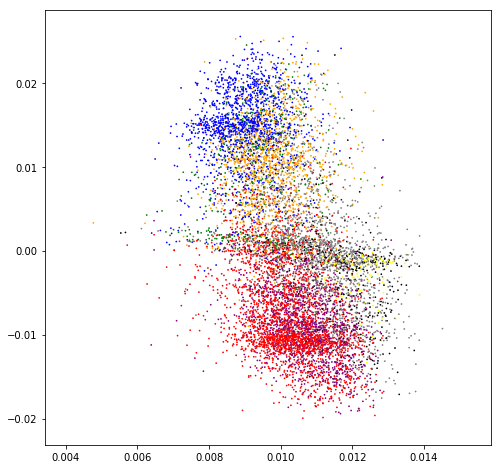

In [23]:
creacion_PCA(2,encuesta_dum,"partido")

In [68]:
#funcion para conocer la matriz de correlación
def creacion_matriz_correlacion(data):
    correlacion = data.corr()
    mask = np.zeros_like(correlacion, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize = (25,25))
    ax = sns.heatmap(correlacion,mask=mask, annot=True)
    return ax





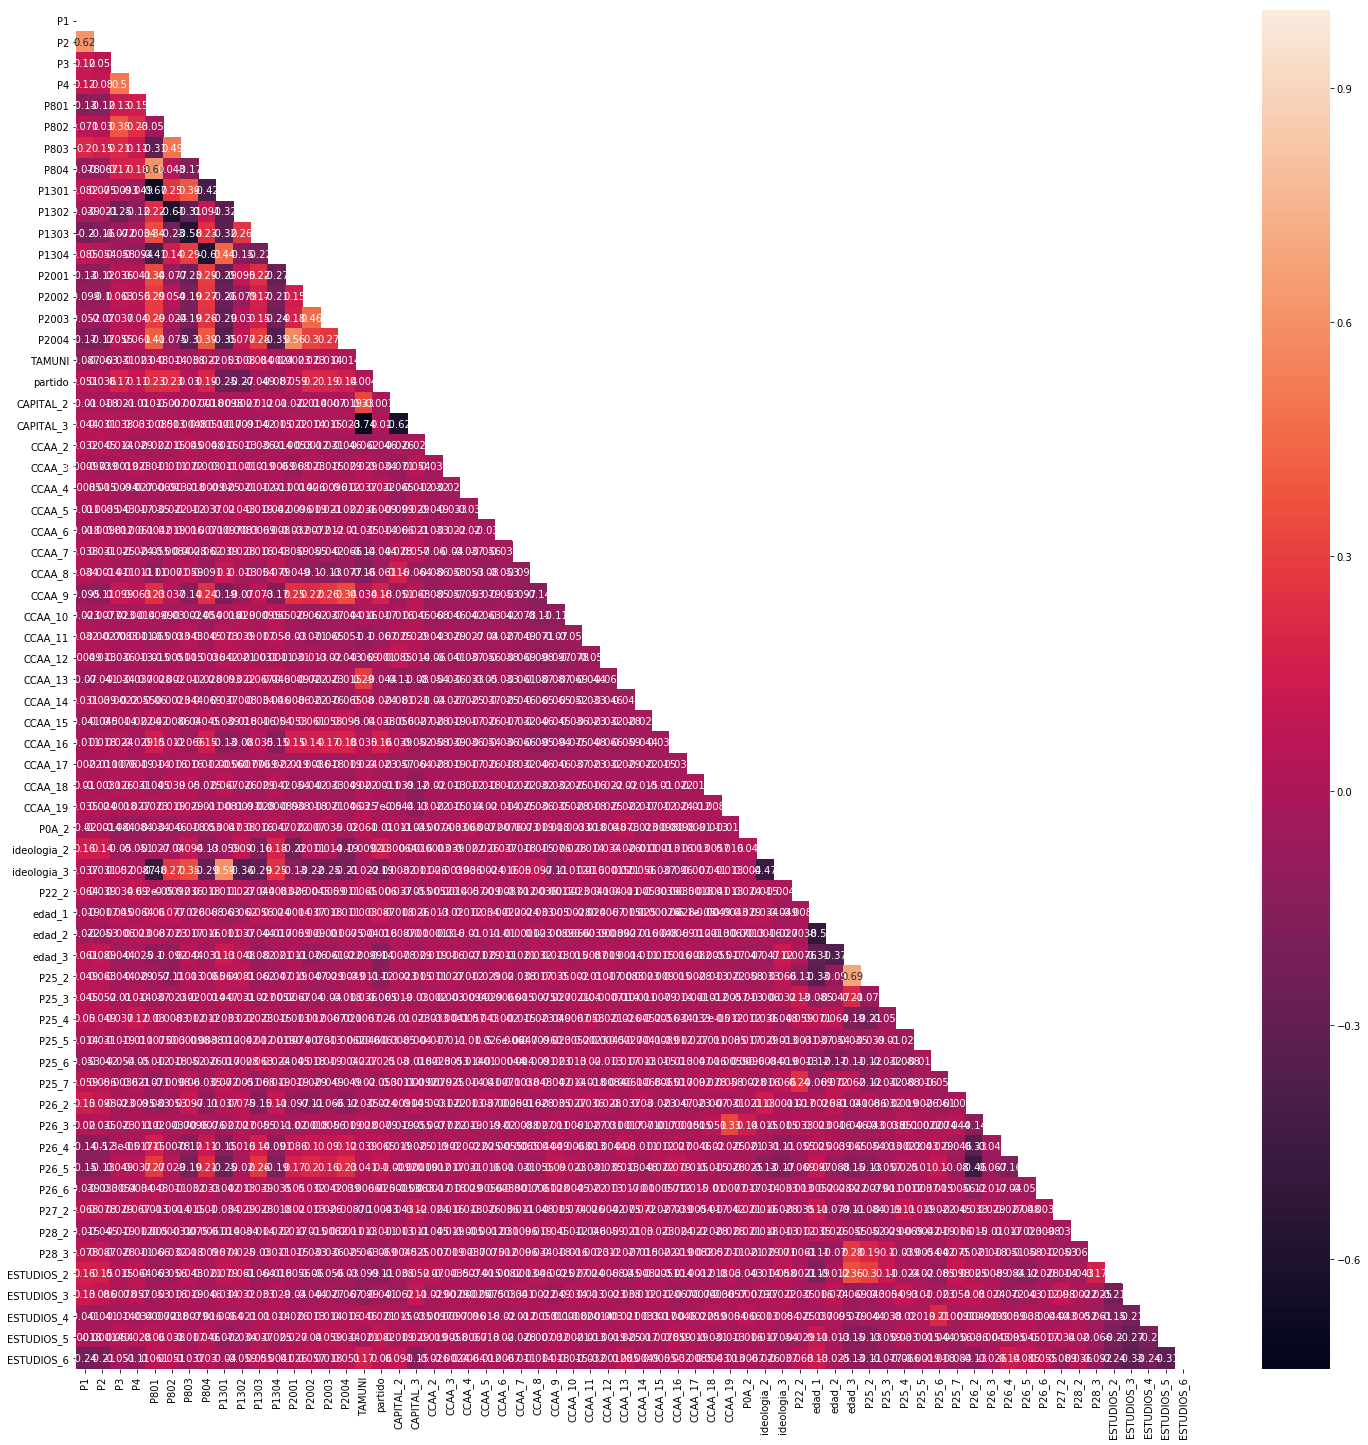

In [69]:
creacion_matriz_correlacion(encuesta_dum)

In [26]:
def variables_superan_limitedecorrelacion(data):
    columns_to_drop=[]                  
    for c in data.columns:
        for i in range(len(data.corr())):
            if abs(data.corr()[c][i])>0.9 and abs(data.corr()[c][i])<1:columns_to_drop.append(c)
    columns_to_drop=list(set(columns_to_drop))   
    return len(columns_to_drop)

In [27]:
variables_superan_limitedecorrelacion(encuesta_dum)

In [90]:
#función para poder realizar los distintos modelos
def modelos(data,columnadep):
    X=data.loc[:,data.columns!= columnadep]
    y=data[columnadep]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    #modelos
    lr = LogisticRegression(solver ='liblinear',max_iter=500)
    cls = svm.SVC(gamma='auto', probability=True)
    neigh3 = KNeighborsClassifier(n_neighbors=3)
    neigh5 = KNeighborsClassifier(n_neighbors=5)
    bosque=RandomForestClassifier(n_estimators=500, criterion='gini')
    gnb = GaussianNB()
    arbol = tree.DecisionTreeClassifier()
    svc = SVC(kernel='rbf', gamma='scale')
    gbc=GradientBoostingClassifier()

    #entrenando
    cls.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    neigh3.fit(X_train, y_train) 
    neigh5.fit(X_train, y_train) 
    bosque.fit(X_train, y_train) 
    arbol.fit(X_train, y_train)
    gnb.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    gbc.fit(X_train, y_train)

    y_predlr = lr.predict(X_test)
    y_predcls = cls.predict(X_test)
    y_pred_neigh3= neigh3.predict(X_test)
    y_pred_neigh5= neigh5.predict(X_test)
    y_pred_bosque= bosque.predict(X_test)
    y_pred_tree= arbol.predict(X_test)
    y_pred_gnd = gnb.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    y_pred_gbc=gbc.predict(X_test)

    
    print("Accuracy lineal:",metrics.accuracy_score(y_test, y_predcls))
    print("Accuracy logistics:",metrics.accuracy_score(y_test, y_predlr))
    print("Accuracy neigh3:",metrics.accuracy_score(y_test, y_pred_neigh3))
    print("Accuracy neigh5:",metrics.accuracy_score(y_test, y_pred_neigh5))
    print("Accuracy bosque:",metrics.accuracy_score(y_test, y_pred_bosque))
    print("Accuracy tree:",metrics.accuracy_score(y_test, y_pred_tree))
    print("Accuracy gnd:",metrics.accuracy_score(y_test, y_pred_gnd))
    print("Accuracy svc:",metrics.accuracy_score(y_test, y_pred_svc))
    print("Accuracy gbc:",metrics.accuracy_score(y_test, y_pred_gbc))
    


    # Your code here:
    print("matriz de confusion lineal","\n",confusion_matrix(y_test, y_predlr))
    print("matriz de confusion vecino3","\n",confusion_matrix(y_test, y_pred_neigh3))
    print("matriz de confusion vecino5","\n",confusion_matrix(y_test, y_pred_neigh5))
    print("matriz de confusion bosque","\n",confusion_matrix(y_test, y_pred_bosque))
    print("matriz de confusion tree","\n",confusion_matrix(y_test, y_pred_tree))
    print("matriz de confusion gnd","\n",confusion_matrix(y_test, y_pred_gnd))
    print("matriz de confusion svc","\n",confusion_matrix(y_test, y_pred_svc))
    print("matriz de confusion gbc","\n", confusion_matrix(y_test, y_pred_gbc))

In [91]:
#se visualizan los distintos modelos y se ven que los mejores son el modelo lineal, el RandomForestClassifier
# y el modelo svc junto a gbc
modelos(encuesta_dum,"partido")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.6913251729643427
Accuracy logistics: 0.6812134113890367
Accuracy neigh3: 0.613092070250133
Accuracy neigh5: 0.640234167110165
Accuracy bosque: 0.689196381053752
Accuracy tree: 0.6035125066524747
Accuracy gnd: 0.407131452900479
Accuracy svc: 0.6753592336349122
Accuracy gbc: 0.6923895689196381
matriz de confusion lineal 
 [[239   8   0  28   9   0   0   0   0   7]
 [  2 469  16   9   0   2   1   1   3  10]
 [  0  42 180   4   2   8   1   1   7  14]
 [ 22  18   0 197   4   0   1   0   0  13]
 [ 37   0   1  11  26   0   0   0   0  11]
 [  0   4   6   0   1  60   0   0   1   5]
 [  0   7   0   0   0   0  16   6   0   2]
 [  0   0   6   0   0   0   2  20   0   0]
 [  3  23  22   6   2  22   1   2   7  15]
 [ 17  68  22  33   3  13   8   4   2  66]]
matriz de confusion vecino3 
 [[237   7   0  31  10   0   0   0   0   6]
 [  7 446  17  10   0   2   1   0   1  29]
 [  2  60 156   3   3  12   2   5   4  12]
 [ 43  19   2 172   2   0   0   0   0  17]
 [ 38   5   4  16  18   0 

In [94]:
#creo una funcion para conocer cual es el mejor modelo estadistico en las regresiones lineales, de esta forma 
#conozco las variables que son mas significativas y las que se pueden quitar para ayudar a corregir el modelo
def modeloestadistico(modelo,dat):
    results = smf.ols(modelo, data=dat).fit()
    print (results.summary())

In [95]:
#Primero lo realizo con todas las variables y en el siguiente caso elimino las no significativas
modeloestadistico('partido ~ P1 + P2 + P3 + P4 + P801 + P802 + P803 + P804 + P1301 + P1302 + P1303 + P1304 + P2001 + P2002 + P2003 + P2004 + TAMUNI+ edad_1 + edad_2 + edad_3 + ESTUDIOS_2 + ESTUDIOS_3 + ESTUDIOS_4 + ESTUDIOS_5 + ESTUDIOS_6 + CAPITAL_2 + CAPITAL_3 + CCAA_2 + CCAA_3 + CCAA_4 + CCAA_5 + CCAA_6 + CCAA_7 + CCAA_8 + CCAA_9 + CCAA_10 + CCAA_11 + CCAA_12 + CCAA_13 + CCAA_14 + CCAA_15 + CCAA_16 + CCAA_17 + CCAA_18 + CCAA_19 + P25_2 + P25_3 + P25_4 + P25_5 + P25_6 + P25_7 + P26_2 + P26_3 + P26_4 + P26_5 + P26_6 + P27_2 + P28_2 + P28_3 ',encuesta_dum)


                            OLS Regression Results                            
Dep. Variable:                partido   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     59.89
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:20:04   Log-Likelihood:                -22047.
No. Observations:                9395   AIC:                         4.421e+04
Df Residuals:                    9335   BIC:                         4.464e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6103      0.426      6.134      0.0

In [32]:
#existen todavia variables no significativas que se han dejado como consecuencia de que son dummies y si se 
#eliminan dificultan después la comprensión 
modeloestadistico('partido ~ P1  + P3 + P801 + P802 + P803 + P804 + P1301 + P1302 + P1303 + P1304 + P2001 + P2002 + P2003 + P2004 + TAMUNI+ CAPITAL_2 + CAPITAL_3+ edad_1 + edad_2 + edad_3   + CCAA_2 + CCAA_3 + CCAA_4 + CCAA_5 + CCAA_6 + CCAA_7 + CCAA_8 + CCAA_9 + CCAA_10 + CCAA_11 + CCAA_12 + CCAA_13 + CCAA_14 + CCAA_15 + CCAA_16 + CCAA_17 + CCAA_18 + CCAA_19 + P25_2 + P25_3 + P25_4 + P25_5 + P25_6 + P25_7  + P28_2 + P28_3 ',encuesta_dum)

                            OLS Regression Results                            
Dep. Variable:                partido   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     75.42
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:10:53   Log-Likelihood:                -22072.
No. Observations:                9395   AIC:                         4.424e+04
Df Residuals:                    9348   BIC:                         4.457e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0953      0.379      8.174      0.0

In [33]:
neo_lista_drop=["P2","P4","ESTUDIOS_2","ESTUDIOS_3","ESTUDIOS_4","ESTUDIOS_5","ESTUDIOS_6", "CAPITAL_2" , "CAPITAL_3","P26_2" , "P26_3" , "P26_4" , "P26_5" , "P26_6", "P27_2"]
encuestatotal=encuesta_dum.drop(columns=neo_lista_drop)

In [34]:
modelos(encuestatotal,"partido")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.7227248536455562
Accuracy logistics: 0.7131452900478978
Accuracy neigh3: 0.651942522618414
Accuracy neigh5: 0.6562001064395955
Accuracy bosque: 0.728046833422033
Accuracy gnd: 0.24906865353911656
Accuracy svc: 0.7147418839808408
Accuracy gbc: 0.7216604576902608
matriz de confusion lineal 
 [[245   9   0  23   7   0   0   0   0   6]
 [  3 516  15   7   1   4   0   0   1  16]
 [  2  32 179   5   0   6   4   2   4   6]
 [ 20  13   3 193   4   0   1   0   1  15]
 [ 30   3   2  15  38   0   0   0   1   8]
 [  0   4   9   0   1  63   0   0   1   1]
 [  0   6   3   0   0   0  18   1   0   1]
 [  0   1   6   0   0   0   1  14   0   1]
 [  3  15  13   9   2  19   1   3   8  12]
 [ 21  61  24  22   4  10   5   4   6  66]]
matriz de confusion vecino3 
 [[248  13   0  11   9   0   0   0   0   9]
 [  9 496  22   7   1   2   0   0   5  21]
 [  3  47 160   4   0  10   2   4   3   7]
 [ 32  21   2 174   5   0   0   0   0  16]
 [ 36   7   2  17  18   0   0   0   0  17]
 [  0   4  18 

In [35]:
#funcion para la creacion del entrenamiento 
def creacionentrenamiento(data,columna,porcentaje):
    X=data.loc[:,data.columns!=columna]
    y=data[columna]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentaje)
    return X_train, X_test, y_train, y_test, X, y

In [100]:
#la función devuelve los valores de train test 
X_train, X_test, y_train, y_test, X, y = creacionentrenamiento(encuestatotal,"partido",0.10)

In [37]:
#funcion para obtener un valor aleatorio y verificar
def get_random_data(dataset):
    return dataset.sample()

In [130]:
#tomamos un valor aleatorio
random_encuesta=get_random_data(X_test)
random_encuesta

,P1,P3,P801,P802,P803,P804,P1301,P1302,P1303,P1304,...,edad_2,edad_3,P25_2,P25_3,P25_4,P25_5,P25_6,P25_7,P28_2,P28_3
3514,1,4,5,3,3,5,0,0,5,0,...,1,0,0,0,0,0,0,0,0,0


In [133]:
#función para visualizar todos los datos
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

In [134]:
displaydf(random_encuesta)

,P1,P3,P801,P802,P803,P804,P1301,P1302,P1303,P1304,P2001,P2002,P2003,P2004,TAMUNI,CCAA_2,CCAA_3,CCAA_4,CCAA_5,CCAA_6,CCAA_7,CCAA_8,CCAA_9,CCAA_10,CCAA_11,CCAA_12,CCAA_13,CCAA_14,CCAA_15,CCAA_16,CCAA_17,CCAA_18,CCAA_19,P0A_2,ideologia_2,ideologia_3,P22_2,edad_1,edad_2,edad_3,P25_2,P25_3,P25_4,P25_5,P25_6,P25_7,P28_2,P28_3
3514,1,4,5,3,3,5,0,0,5,0,10,5,3,9,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


True

In [101]:
#Con el mejor modelo que predice utilizamos el modelo para poder predecir
RFC500g=RandomForestClassifier(n_estimators=500, criterion='gini')
RFC500g.fit(X_train, y_train)
y_pred_RFC500g= RFC500g.predict(X_test)
print("Accuracy RFC500g:",metrics.accuracy_score(y_test, y_pred_RFC500g))

Accuracy RFC500g: 0.7063829787234043


In [184]:
y_pred=RFC500g.predict(random_encuesta)
y_real=y[random_encuesta.index[0]]
y_pred_proba=RFC500g.predict_proba(random_encuesta)
print(y_pred,y_real,y_pred_proba)

[3] 8 [[0.    0.02  0.63  0.    0.    0.012 0.076 0.2   0.026 0.036]]


Text(0.5, 1.0, '¿Con qué partido tienes más ideas en común?')

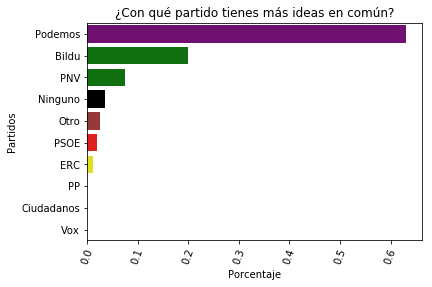

In [185]:
labels=("PP","PSOE","Podemos","Ciudadanos","Vox","ERC","PNV","Bildu","Otro","Ninguno")
valores = []
for a in y_pred_proba[0]:
    valores.append(a)
clrs = ["blue","red","purple","orange","green","yellow","green","green","brown","black"]
    
labels= pd.DataFrame(labels)
labels["valores"]=valores
labels["color"]=clrs
labels = labels.sort_values(by='valores', ascending=False)
grafica = sns.barplot(y=0,x="valores",data=labels,palette=labels.color)
grafica.set_ylabel('Partidos')
grafica.set_xlabel('Porcentaje')
plt.xticks(rotation=70)
plt.title('¿Con qué partido tienes más ideas en común?')

# Prueba con  casos reales

In [245]:
prueba= abrircsv("prueba",'../Prueba.csv',',',0)

In [246]:
def categorizarvariables(prueba):
    etiquetas1_3=[1,2,3]
    cortes0_10 = [0,3,6,10]
    prueba["ideologia"] = pd.cut(prueba['P19'],cortes0_10, labels=etiquetas1_3)
    etiquetas0_4=[0,1,2,3]
    cortes0_100 = [0,30,45,65,100]
    prueba["edad"] = pd.cut(prueba['P23'],cortes0_100, labels=etiquetas0_4)
    etiquetas0_6=[1,2,3,4,5,6]
    cortes0_7 = [1,2,3,4,5,6,7]
    prueba["ESTUDIOS"] = pd.cut(prueba['ESTUDIOS'],cortes0_7, labels=etiquetas0_6)
    lista1_3=["CAPITAL","P28"]
    cortes1_3=[1,2,3,4]
    for a in lista1_3:
        prueba[a] = pd.cut(prueba[a],cortes1_3, labels=etiquetas1_3)
    etiquetas1_19=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    cortes1_19=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    prueba["CCAA"] = pd.cut(prueba['CCAA'],cortes1_19, labels=etiquetas1_19)
    lista1_2=["P0A","P22","P27"]
    etiquetas1_2=[1,2]
    cortes1_2=[1,2,3]
    for a in lista1_2:
        prueba[a] = pd.cut(prueba[a],cortes1_2, labels=etiquetas1_2)
    etiquetas1_7=[1,2,3,4,5,6,7]
    cortes1_7=[1,2,3,4,5,6,7,8]
    prueba["P25"] = pd.cut(prueba['P25'],cortes1_7, labels=etiquetas1_7)
    etiquetas1_6=[1,2,3,4,5,6]
    cortes1_6=[1,2,3,4,5,6,7]
    prueba["P26"] = pd.cut(prueba['P26'],cortes1_6, labels=etiquetas1_6)
    columnas_drop = ["P23","P19"]
    for a in columnas_drop:
        prueba=prueba.drop(columns=a)
    return prueba


In [247]:
prueba = categorizarvariables(prueba)

In [248]:
prueba_dum = creacion_dummies(prueba,["CAPITAL","CCAA","P0A","ideologia","P22","edad","P25","P26","P27","P28","ESTUDIOS"],True);

In [249]:
pruebatotal=prueba_dum.drop(columns=neo_lista_drop)

In [250]:
pruebatotal[4:]

,P1,P3,P8001,P8002,P8003,P8004,P1301,P1302,P1303,P1304,...,edad_2,edad_3,P25_2,P25_3,P25_4,P25_5,P25_6,P25_7,P28_2,P28_3
4,2,5,5,5,3,5,0,5,7,0,...,0,0,0,0,0,0,0,0,0,0
5,2,3,2,3,2,3,0,6,7,2,...,0,0,0,0,0,1,0,0,0,0


In [252]:
y_pred=bosque500g.predict(pruebatotal[5:])
y_pred_proba=bosque500g.predict_proba(pruebatotal[5:])
print(y_pred,y_pred_proba)

[3] [[0.02  0.208 0.54  0.02  0.004 0.004 0.05  0.002 0.056 0.096]]


Text(0.5, 1.0, '¿Con qué partido tienes más ideas en común?')

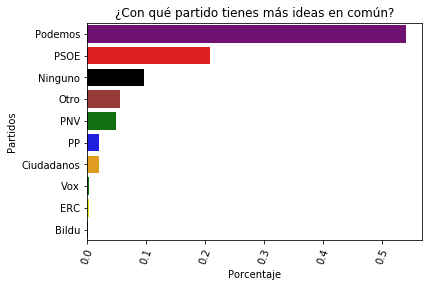

In [253]:
labels=("PP","PSOE","Podemos","Ciudadanos","Vox","ERC","PNV","Bildu","Otro","Ninguno")
valores = []
for a in y_pred_proba[0]:
    valores.append(a)
clrs = ["blue","red","purple","orange","green","yellow","green","green","brown","black"]
    
labels= pd.DataFrame(labels)
labels["valores"]=valores
labels["color"]=clrs
labels = labels.sort_values(by='valores', ascending=False)
grafica = sns.barplot(y=0,x="valores",data=labels,palette=labels.color)
grafica.set_ylabel('Partidos')
grafica.set_xlabel('Porcentaje')
plt.xticks(rotation=70)
plt.title('¿Con qué partido tienes más ideas en común?')